In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image, ImageDraw, ImageEnhance
from skimage import io
import math 
from skimage import img_as_float
import numpy as np
import cv2

uploaded = files.upload()

import matplotlib.pyplot as plt

Saving coins.jpg to coins (2).jpg


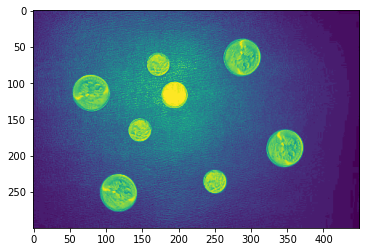

In [ ]:
image = io.imread(BytesIO(uploaded['coins.jpg']))
gray = c
gray = np.array(gray / 10, dtype=np.uint8)
plt.imshow(gray)
plt.show()
plt.close()

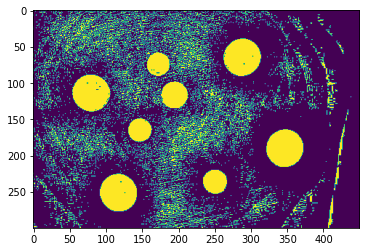

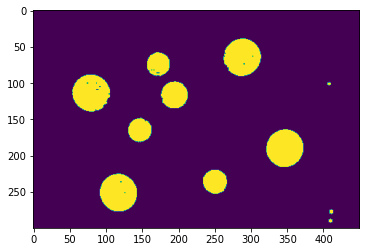

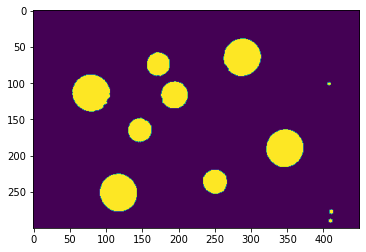

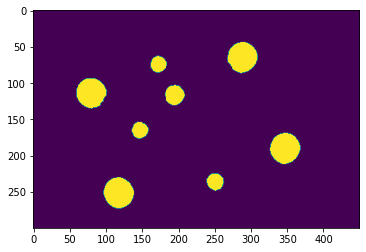

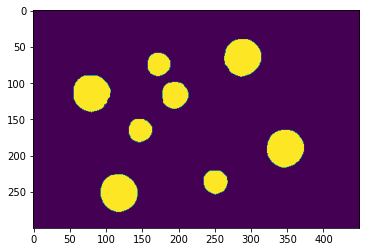

In [ ]:
binarized = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 73, 0)
plt.imshow(binarized)
plt.show()
plt.close()
opened = cv2.morphologyEx(binarized, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
plt.imshow(opened)
plt.show()
plt.close()
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
plt.imshow(closed)
plt.show()
plt.close()
closed = cv2.erode(closed, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
plt.imshow(closed)
plt.show()
plt.close()
closed = cv2.dilate(closed, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
plt.imshow(closed)
plt.show()
plt.close()

In [ ]:
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
cnt_area = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    cnt_area.append(area)
indices = np.array(cnt_area).argsort()
sorted_area = sorted(cnt_area)

border_val_id = np.argmax(np.diff(sorted_area)) + 1
print(border_val_id)

4


In [ ]:
small = indices[:border_val_id]
print(small)
big = indices[border_val_id:]
print(big)

[6 3 1 4]
[5 7 2 0]


In [ ]:
image_draw = image.copy()
for i in indices:
    if i in small:
        cv2.drawContours(image_draw, contours, i, (0, 255, 0), 2)
    else:
        cv2.drawContours(image_draw, contours, i, (255, 0, 0), 2)

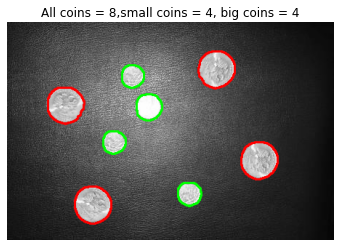

In [ ]:
plt.imshow(image_draw, cmap='gray')
plt.axis('off')
plt.title(f'All coins = {len(indices)},small coins = {len(small)}, big coins = {len(big)}')
plt.show()